<a href="https://colab.research.google.com/github/muditbit/img_classifier_SVM_or_XGBoost/blob/master/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#8Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os 
from skimage.io import imread
from skimage.transform import resize

In [ ]:
#installing bing-image-downloader
!pip install bing-image-downloader



In [ ]:
#creating images folder in directory
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [ ]:
#downloading images for dataset through bing images (web scrapping)
from bing_image_downloader import downloader
downloader.download("Dog",limit=30,output_dir = 'images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from http://www.easypetmd.com/sites/default/files/German Shepherd Dog.jpg (6).jpeg
[!] Issue getting: http://www.easypetmd.com/sites/default/files/German Shepherd Dog.jpg (6).jpeg
[!] Error:: URL can't contain control characters. '/sites/default/files/German Shepherd Dog.jpg (6).jpeg' (found at least ' ')
[%] Downloading Image #1 from http://tranquilmonkey.com/wp-content/uploads/2014/07/funny-underwater-dog-photos-6.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.doseoffunny.com/wp-content/uploads/2014/05/funny-pun-husky-meme-pupsicle.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.newslinq.com/wp-content/uploads/2016/08/cutest-puppies-in-the-world-10.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.gravetics.com/wp-content/uploads/2017/07/Dalmatian-Firefighter.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://moderndogmagazine.

In [ ]:
downloader.download("Cat",limit=30,output_dir = 'images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://www.recreoviral.com/wp-content/uploads/2015/10/Fotos-de-gatos-tomadas-en-el-momento-exacto-1.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.barnorama.com/wp-content/uploads/2016/11/04-underwater_lake.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.thedailytop.com/wp-content/uploads/2014/05/bc7253a22256f072d0db5eb6fb811926.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.recreoviral.com/wp-content/uploads/2015/05/Gatos-que-se-sientas-chistosos-22.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://3.bp.blogspot.com/-XLyBgoHmn1k/VGTa_3RxYLI/AAAAAAABFzc/EWGogDHGqAo/s1600/People%2Bwith%2BTheir%2BCats%2Bfrom%2Bthe%2B1920s%2B(14).jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://hartvoordieren.nl/wp-content/uploads/sites/3/2016/10/FILE-20161028-1019JJGE8BTQGPH7.jpg
[%] File Downloaded !

[%] Downloading Imag

In [ ]:
#preprocessing 
target =[]
flat_data =[]
images =[]

datadir = '/content/images'
CATEGORIES = ['Cat','Dog']

for category in CATEGORIES:
  #print(category)
  class_num = CATEGORIES.index(category) # label encoding (0 : for cat and 1 : for dog)
  #print(class_num)\
  path = os.path.join(datadir,category)
  #print(path)
  for img in os.listdir(path):
    img_ar = imread(os.path.join(path,img)) #reading the image from the directory
    #print(img_ar.shape)
    #plt.imshow(img_ar)
    img_resized = resize(img_ar,(150,150,3)) #resizing the image
    flat_data.append(img_resized.flatten()) #flattening the data 
    images.append(img_resized)
    target.append(class_num)

# creating numpy array of the processed data
flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
unique,count = np.unique(target,return_counts=True)

In [ ]:
count , unique

(array([30, 30]), array([0, 1]))

<BarContainer object of 2 artists>

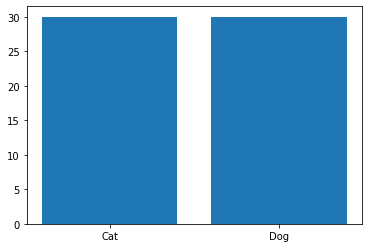

In [ ]:
plt.bar(CATEGORIES,count)

In [ ]:
#spliting the data into testing and training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data,target,test_size =0.4, random_state = 123)

In [ ]:
y_test

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1])

In [ ]:
#creating the model using GRIDSEARCHCVto get best parameter for SVClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = [
              {'C':[1,10,100,1000],'kernel':['rbf']},
              {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.01,0.001,0.0001,0.00001]},

]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)

In [ ]:
#fitting the data
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred  =clf.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0])

In [ ]:
y_test

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1])

In [ ]:
#calculating accuracy score and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
s = (accuracy_score(y_pred,y_test))
print(s)
confusion_matrix(y_pred,y_test)

0.75


array([[13,  6],
       [ 0,  5]])

In [ ]:
#creating model using XGBOOST
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_predict = model.predict(x_test)
y_predict

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0])

In [ ]:
y_test

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1])

In [ ]:
x = accuracy_score(y_predict,y_test)
x

0.5

In [ ]:
confusion_matrix(y_predict,y_test)


array([[6, 5],
       [7, 6]])

In [ ]:
#pickle is use to save the model in directory for further use 
import pickle
if x>s:
  pickle.dump(model,open('img_model.p','wb'))
else:
  pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
#loading model from directory
model1 =pickle.load(open('img_model.p','rb'))

Enter URLhttps://site-547756.mozfiles.com/files/547756/catitems/Jaguar-b6a077f108c598a8d1ebb2dc9b3bdf99.jpg
(800, 1200, 3)
The image is much similar to : Cat


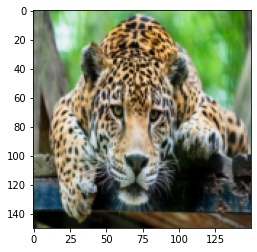

In [ ]:
#testing the brand new Image
flat_data = []
url = input("Enter URL")
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data  =np.array(flat_data)
print(img.shape)

plt.imshow(img_resized)
y_out = model1.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'The image is much similar to : {y_out}')